<a href="https://colab.research.google.com/github/sebabratakundu/ameo_data_analysis/blob/master/Ameo_Data_Descriptive_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descriptive Analysis on Ameo 2015 Data set

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns

In [87]:
sns.set(color_codes=True)

In [88]:
df = pd.read_excel("train.xlsx");

In [89]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [90]:
df.shape

(3998, 39)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [92]:
df.isnull().sum().sum()

0

In [93]:
df.Gender.unique()

array(['f', 'm'], dtype=object)

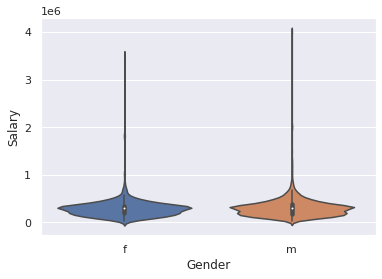

In [94]:
sns.violinplot(x="Gender",y="Salary",data=df);

In [95]:
df[["10percentage","12percentage","collegeGPA","Gender"]].groupby("Gender").mean()

,10percentage,12percentage,collegeGPA
Gender,,,
f,80.932894,77.007618,74.048056
m,76.979000,73.666636,70.679947


In [96]:
df[["10percentage","12percentage","collegeGPA","Gender"]].groupby("Gender").median()

,10percentage,12percentage,collegeGPA
Gender,,,
f,82.4,77.0,74.00
m,78.0,73.4,70.66


In [97]:
df[["10percentage","12percentage","collegeGPA","Gender"]].groupby("Gender").count()

,10percentage,12percentage,collegeGPA
Gender,,,
f,957,957,957
m,3041,3041,3041


In [98]:
df[["Salary","Gender"]].groupby("Gender").count()

,Salary
Gender,
f,957
m,3041


In [99]:
print("Female percentage : ", 957/(3041+957)*100)

Female percentage :  23.936968484242122


In [100]:
print("Male percentage : ", 3041/(3041+957)*100)

Male percentage :  76.06303151575788


In [101]:
df[["conscientiousness","agreeableness","extraversion","nueroticism","openess_to_experience","Gender"]].groupby("Gender").mean()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.121034,0.292444,0.012173,-0.179358,0.038246
m,-0.087826,0.100566,-0.000198,-0.165783,-0.193609


In [102]:
df[["conscientiousness","agreeableness","extraversion","nueroticism","openess_to_experience","Gender"]].groupby("Gender").median()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.2718,0.3789,0.0914,-0.23440,0.0973
m,-0.0154,0.2124,0.0914,-0.17277,-0.0943


In [103]:
df[["Salary","Gender"]].groupby("Gender").mean()

,Salary
Gender,
f,294937.304075
m,311716.211772


In [104]:
df[["Salary","Gender"]].groupby("Gender").median() #definately there are outliers

,Salary
Gender,
f,300000
m,300000


In [105]:
th = df.Salary.mean() + df.Salary.std()

In [106]:
th

520437.3498818199

In [107]:
df["HighIncome"] = df.Salary > th;

In [108]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,HighIncome
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,False
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,False
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,False
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,True
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,False


In [109]:
df[["Salary","HighIncome","Gender"]].groupby(["HighIncome","Gender"]).mean()

Salary
HighIncome Gender               
False      f       271499.454744
           m       272598.433606
True       f       832250.000000
           m       785344.827586

In [110]:
df[["Salary","HighIncome","Gender"]].groupby(["HighIncome","Gender"]).median()

Salary
HighIncome Gender        
False      f       300000
           m       290000
True       f       652500
           m       620000

In [111]:
df[["Salary","HighIncome","Gender"]].groupby(["HighIncome","Gender"]).count()

Salary
HighIncome Gender        
False      f          917
           m         2809
True       f           40
           m          232

In [112]:
print("Low income female percentage : ", 917/(2809+917)*100)

Low income female percentage :  24.610842726784757


In [113]:
print("High income female percentage : ", 40/(232+40)*100)

High income female percentage :  14.705882352941178


So the high income is not the case for which female are incoming low salary than male. we found that the percentage of female working in high paying jobs are 10% less. which gives us a good insight

In [114]:
df.CollegeTier.unique()

array([2, 1])

In [115]:
df[["CollegeTier","HighIncome","Salary"]].groupby(["HighIncome","CollegeTier"]).count()

Salary
HighIncome CollegeTier        
False      1               234
           2              3492
True       1                63
           2               209

In [116]:
print("Low income 2 tier college percentage : ",3492/(3492+234)*100)

Low income 2 tier college percentage :  93.71980676328504


In [117]:
print("High income 2 tier college percentage : ",209/(209+63)*100)

High income 2 tier college percentage :  76.83823529411765


So we cleary see that tier 1 colleges are more effective for high paying jobs

In [118]:
df[["CollegeTier","Gender","Salary"]].groupby(["CollegeTier","Gender"]).count()

Salary
CollegeTier Gender        
1           f           51
            m          246
2           f          906
            m         2795

In [119]:
print("1 tier College female percentage : ", 51/(246+51)*100)

1 tier College female percentage :  17.17171717171717


In [120]:
print("2 tier College female percentage : ", 906/(906+2795)*100)

2 tier College female percentage :  24.479870305322883


We cleary see that the percentage of female candidates are much lower in high paying jobs althogh there is a inequality of female and male candidate in our dataset.

But it might be a cause that female are not getting high salary.


---


**So we can suggest that , if we encourage female to join the high tier college then there could be a possibility to balance the salary inequality**